# HW03: Distance and Topic Model

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

## Load and Pre-process Text

In [2]:
#Import the AG news dataset (same as hw01)
#Download them from here 
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

# text sample
dfs = df.sample(200)
print(dfs["text"].head())

##TODO pre-process text as you did in HW02
def tokenize(str):
    new_str = ''
    for w in nlp(str):
        if not w.is_stop and not w.is_punct and not w.is_digit:
            new_str += w.lemma_.lower() + ' ' 
    return new_str

dfs["toks"] = dfs["text"].apply(tokenize)
print(dfs["toks"].head())

##TODO vectorize the pre-processed text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dfs["toks"])
print(f'X has shape {X.shape}')


/home/felix/miniconda3/envs/nlp_lss/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100889    UN probes reports of Rwanda attacks United Nat...
38689     The passion of the athlete Shawn Green is a vi...
43042     Cell phone talker's arrest stirs etiquette deb...
31200     Do You Deserve More Credit? Sometimes you shou...
100950    BAR stops Davidson #39;s Williams test Motorsp...
Name: text, dtype: object
100889    un probe report rwanda attack united nations o...
38689     passion athlete shawn green vital player los a...
43042     cell phone talker arrest stir etiquette debate...
31200                deserve credit lender give room spend 
100950    bar stop davidson 39;s williams test motorspor...
Name: toks, dtype: object
X has shape (200, 2371)


## Cosine Similarity and PCA

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

##TODO compute the cosine similarity for the first 200 snippets 
# and for the first snippet, show the three most similar snippets 
# and their respective cosine similarity scores

# compute cosine similarity
sim = cosine_similarity(X[:200, :])
print(f'sim has shape {sim.shape}\n')

# get first snipped
print(f"Most similar snippets to first snippet:\n{dfs['text'].iloc[0]}")

# iterate by similariy
order = np.flip(sim[0, 0:].argsort(0))
for rank, snip_idx in enumerate(order[1:4], 1):
    snip_sim = sim[0, snip_idx]
    snip = dfs['text'].iloc[snip_idx]

    print("\n##########################################\n")
    print("{}. with {:.8f} similarity:\n{}".format(rank, snip_sim, snip))


sim has shape (200, 200)

Most similar snippets to first snippet:
UN probes reports of Rwanda attacks United Nations officials are investigating reports that Hutu extremists have attacked Rwandan villages from bases in eastern Congo.

##########################################

1. with 0.13655775 similarity:
Report: Symantec in talks to acquire Veritas Software Symantec Corp. #39;s reported interest in acquiring Veritas Software Corp. for more than \$13 billion would represent the computer security giant #39;s biggest step yet beyond its core 

##########################################

2. with 0.13159034 similarity:
Merck knew of Vioxx health risks: report WHITEHOUSE STATION, NJ - Merck and Co. shares fell more than 10 per cent in trading on the NYSE on Monday amid reports that company documents showed the pharmaceutical firm knew for years about health issues related to its arthritis drug Vioxx.

##########################################

3. with 0.11487594 similarity:
Annan Calls 

In [5]:
from sklearn.decomposition import PCA,TruncatedSVD

#pca = PCA(n_components=3, svd_solver='randomized') <- this doesn't work?!
pca = TruncatedSVD(n_components=3, algorithm='randomized')

##TODO reduce the vectorized data using PCA
X_pca = pca.fit_transform(X)
print("PCA variance explained: {:.3f}%".format(np.sum(pca.explained_variance_ratio_)*100))

##TODO compute again cosine similarity with the reduced version for the first 200 snippets
sim = cosine_similarity(X_pca[:200, :])
print(f'sim has shape {sim.shape}\n')

##TODO for the first snippet, show again its three most similar snippets
print(f"Most similar snippets to first snippet:\n{dfs['text'].iloc[0]}")

# iterate by similariy
order = np.flip(sim[0, 0:].argsort(0))
for rank, snip_idx in enumerate(order[1:4], 1):
    snip_sim = sim[0, snip_idx]
    snip = dfs['text'].iloc[snip_idx]

    print("\n##########################################\n")
    print("{}. with {:.8f} similarity:\n{}".format(rank, snip_sim, snip))

PCA variance explained: 6.997%
sim has shape (200, 200)

Most similar snippets to first snippet:
UN probes reports of Rwanda attacks United Nations officials are investigating reports that Hutu extremists have attacked Rwandan villages from bases in eastern Congo.

##########################################

1. with 0.99899568 similarity:
GDP Up, But Not Enough for Economists  WASHINGTON (Reuters) - U.S. consumers fed a pick-up in U.S.  economic growth in the third quarter but a sentiment survey for  this month showed oil prices were dampening their spirits,  government and private-sector data showed on Friday.

##########################################

2. with 0.99850447 similarity:
Cirrus Logic to Lay Off Workers Cirrus Logic Inc., a maker of microchips for consumer electronics, on Wednesday said it will lay off 7 percent of its employees to save \$2 million to \$3 million per quarter, with expense reductions starting in its third quarter.

#########################################

Compare the cosine similarity before and after PCA reduction. Did the results change? 

In [6]:
# The variance explained is very low and the similarity did change by a large 
# amount. All snippets have high similarity and the order is not preserved.

## Clustering

51062    Bush Asks Another  #36;691M in Hurricane Aid (...
96494    Congress Blocks Net Connection Taxation (AP) A...
70867    Bush, Kerry, Parties Spending  #36;40M on Ads ...
29285    U.S. Mint to Unveil New Nickel Designs (AP) AP...
16055    Schwarzenegger Lauds Bush on Terror Fight (AP)...
Name: text, dtype: object
Cluster histogram


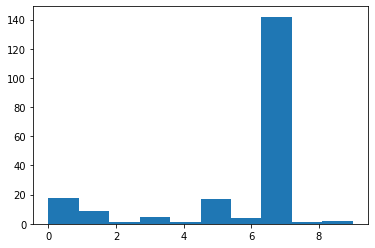

100%|██████████| 48/48 [00:41<00:00,  1.15it/s]


Silhoutte scores:


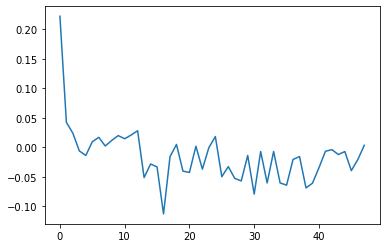

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from tqdm import tqdm

##TODO create the clusters found with k-means clustering nd 10 clusters
km = KMeans(n_clusters=10).fit(X)
dfs['cluster'] = km.labels_.tolist()
print(dfs[dfs['cluster']==0]['text'].head())


print("Cluster histogram")
plt.hist(km.labels_.tolist())
plt.show()

##TODO find the optimal number of clusters in a range from 2 to 50 using the silhouette score
sil_scores = []
for n in tqdm(range(2, 50)):
    km = KMeans(n_clusters=n).fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

print("Silhoutte scores:")
plt.plot(sil_scores)
plt.show()


opt_sil_score: 0.028316512345661522
opt_n_clusters 14
38689    The passion of the athlete Shawn Green is a vi...
6103     NL Wrap: Green Homers Lift Los Angeles Past At...
Name: text, dtype: object
Cluster histogram


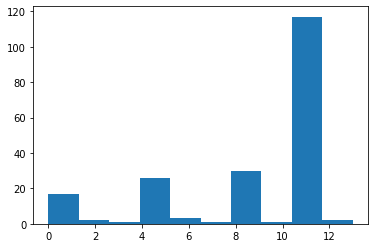

In [24]:
##TODO create the clusters using the opitmal number of clusters obtained before
opt_sil_score = max(sil_scores[3:])
opt_n_clusters = 2 + sil_scores.index(opt_sil_score)
print(f"opt_sil_score: {opt_sil_score}")
print(f"opt_n_clusters {opt_n_clusters}")

##TODO compare the documents in cluster "1" under the two specifications, does the cluster look cleaner after having searched for the optimal number of clusters?
km = KMeans(n_clusters=opt_n_clusters).fit(X)
dfs['cluster'] = km.labels_.tolist()
print(dfs[dfs['cluster']==0]['text'].head())


print("Cluster histogram")
plt.hist(km.labels_.tolist())
plt.show()

In [ ]:
# It doesn't seem to make a lot more sense.. still very imbalanced clusters.
# Probably also due to very similar (low) shilouette scores for all num_clusters

## Topic Modeling: LDA

For this part you will need to use LDA Mallet. If you cannot have Mallet run, you can use the simple LDA algorithm 

In [36]:
from gensim.corpora import Dictionary
#from gensim.models.wrappers import LdaMallet
from gensim.models import ldamodel
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

##TODO create a dictionary with the pre-processed tokenized text and filter it according to frequencies and keeping 1000 vocabularies

def tokenize(x):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit and len(w) > 2]

doc_clean = []
for doc in dfs['text']:
    doc_clean.append(tokenize(doc))

dictionary = corpora.Dictionary(dfs['toks'])
dictionary.filter_extremes(no_below=10, keep_n=1000)
print(len(dictionary))

##TODO create the doc_term_matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
##TODO train a LDA Mallet model with 5, 10 and 15 topics
##TODO compute the coherence score for each of these model and print the topics from the model with highest coherence score

In [ ]:
import pyLDAvis.gensim
##TODO using LDAvis visualize the topics using the optimal number of topics